### Student Information
Name: Jansen Christopher Yuanda 游金勝

Student ID: 109006267

GitHub ID: jansenchristophery

Kaggle name: Jansen Christopher

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)
<td><img src="img/pic0.png" style="width: 500px;"/> </td>

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# FIRST PART

In [1]:
### Begin Assignment Here
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [2]:
# Answer here
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
nltk.download('punkt')

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens
train_df['unigrams'] = train_df['text'].apply(lambda x: tokenize_text(x))
test_df['unigrams'] = test_df['text'].apply(lambda x: tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_df_counts = train_count_vect.fit_transform(train_df.text) 
test_df_counts = test_count_vect.fit_transform(test_df.text) 
# Sort the term frequencies in descending order, similar to homework 1
import numpy as np
train_term_frequencies = []
print(train_df_counts.shape[1])
for j in range(0,train_df_counts.shape[1]):
    train_term_frequencies.append(sum(train_df_counts[:,j].toarray()))
train_term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
sorted_train_indices = np.argsort(train_term_frequencies)
sorted_train_term_frequencies = train_term_frequencies[sorted_train_indices][::-1]
test_term_frequencies = []
print(test_df_counts.shape[1])
for j in range(0,test_df_counts.shape[1]):
    test_term_frequencies.append(sum(test_df_counts[:,j].toarray()))
test_term_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]
sorted_test_indices = np.argsort(test_term_frequencies)
sorted_test_term_frequencies = test_term_frequencies[sorted_test_indices][::-1]

[nltk_data] Downloading package punkt to C:\Users\Jansen
[nltk_data]     Christopher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


10115
1949


In [3]:
import plotly.express as px
# plot the graph
xlabel = train_count_vect.get_feature_names_out()[sorted_train_indices][::-1]
fig = px.bar(x=xlabel[:30], y=sorted_train_term_frequencies[:30])
fig.update_layout(title_text='Top 30 Training Word Frequencies')
fig.show()

In [4]:
# plot the graph
xlabel = test_count_vect.get_feature_names_out()[sorted_test_indices][::-1]
fig = px.bar(x=xlabel[:30], y=sorted_test_term_frequencies[:30])
fig.update_layout(title_text='Top 30 Testing Word Frequencies')
fig.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
# Learn a vocabulary dictionary of all tokens in the raw documents.
tfidf_vectorizer.fit(train_df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names[100:110]

C:\Users\Jansen Christopher\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [6]:
# Answer here
# actually anger, predicted as anger: 57
# actually fear, predicted as fear: 76
# actually joy, predicted as joy: 56
# actually sadness, predicted as sadness: 47
# actually anger, predicted as fear: 16
# actually anger, predicted as joy: 6
# actually anger, predicted as sadness: 7
# actually fear, predicted as anger: 18
# actually fear, predicted as joy: 9
# actually fear, predicted as sadness: 13
# actually joy, predicted as anger: 6
# actually joy, predicted as fear: 9
# actually joy, predicted as sadness: 7
# actually sadness, predicted as anger: 3
# actually sadness, predicted as fear: 9
# actually sadness, predicted as joy: 8

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

C:\Users\Jansen Christopher\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


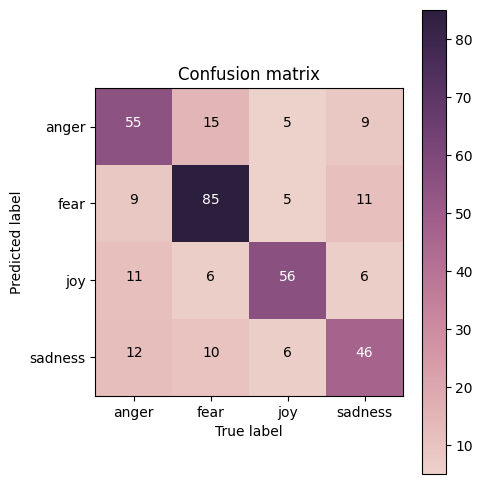

In [8]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# predict!
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# so we get the pred result
y_test_pred[:10]

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [9]:
# Answer here
# The result of the train accuracy from decision tree is way better than naive bayes, but the test accuracy of the naive bayes is better than decision tree. This can show us that the decision tree model might be overfitted to the training data.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [10]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.357598,1.332239,0.455331,1.267961
1,1,0.641572,0.998349,0.657061,0.865781
2,2,0.786604,0.593845,0.717579,0.734227
3,3,0.845281,0.421705,0.717579,0.729735
4,4,0.877387,0.330735,0.711816,0.746283
5,5,0.903128,0.269562,0.700288,0.811643
6,6,0.927484,0.227092,0.694524,0.839659
7,7,0.940769,0.192889,0.680115,0.915004
8,8,0.949350,0.166056,0.694524,0.933647
9,9,0.957376,0.142316,0.685879,0.986241


In [11]:
# Answer here
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['accuracy'], mode='lines', name='Train Accuracy'))
fig.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['val_accuracy'], mode='lines', name='Validation Accuracy'))

fig.update_layout(
    title='Epochs vs Accuracy',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='Accuracy'),
    template='plotly_white'
)

fig.show()

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['loss'], mode='lines', name='Train Loss'))
fig.add_trace(go.Scatter(x=training_log['epoch'], y=training_log['val_loss'], mode='lines', name='Validation Loss'))

fig.update_layout(
    title='Epochs vs Loss',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='Loss'),
    template='plotly_white'
)

fig.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [13]:
# Answer here
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

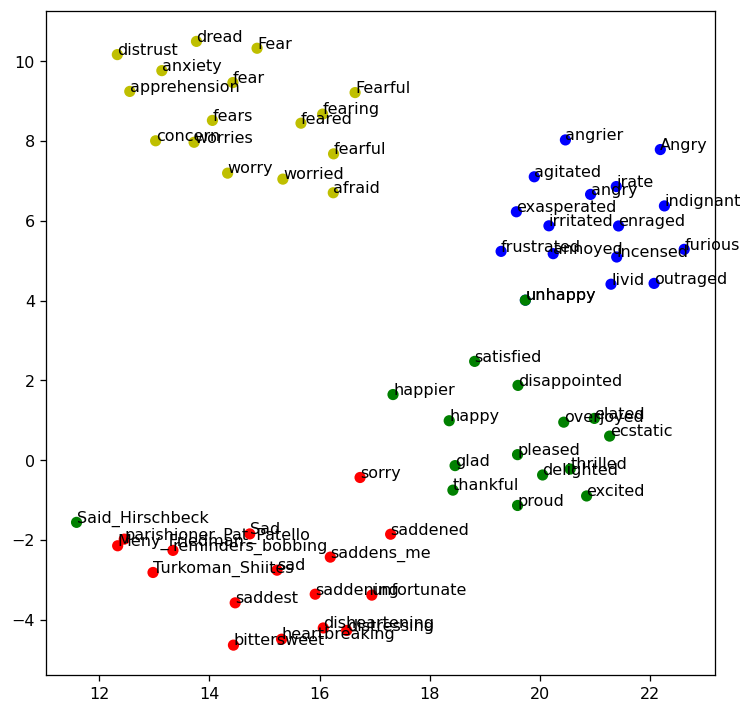

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# w2v model
model = w2v_google_model

# prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# training
X_tsne = tsne.fit_transform(X_train)

# plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# SECOND & THIRD PART

# Preprocess data

In [15]:
import pandas as pd
import json
from pandas import json_normalize

json_file_path = '../data/competition/tweets_DM.json'

data_list = []

with open(json_file_path, 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        data_list.append(data)

# Create a Pandas DataFrame for the tweets_DM file
df = pd.DataFrame(data_list)

# Use json_normalize to flatten the nested fields within "_source"
df_normalized = json_normalize(df["_source"])
result_df = pd.concat([df, df_normalized], axis=1)
df = result_df.drop(columns=["_source"])
df


,_score,_index,_crawldate,_type,tweet.hashtags,tweet.tweet_id,tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [16]:
csv_file_path = '../data/competition/data_identification.csv'
# Create a Pandas DataFrame for the data_identification file
identification_df = pd.read_csv(csv_file_path)
identification_df = identification_df.rename(columns={'tweet_id': 'tweet.tweet_id'})
# Merge the two datasets 
merged_df = pd.merge(df, identification_df, on='tweet.tweet_id', how='inner')

In [17]:
emotion_csv_path = '../data/competition/emotion.csv'

# Create a Pandas DataFrame for the emotion file
emotion_df = pd.read_csv(emotion_csv_path)
emotion_df = emotion_df.rename(columns={'tweet_id': 'tweet.tweet_id'})

In [18]:
# Separate into training and testing DataFrames
training_df = pd.merge(merged_df[merged_df['identification'] == 'train'], emotion_df, on='tweet.tweet_id', how='inner')
testing_df = merged_df[merged_df['identification'] == 'test']
testing_df.reset_index(drop=True, inplace=True)

# Classify

## RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1500, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(training_df['tweet.text'])
X_test = tfidf_vectorizer.transform(testing_df['tweet.text'])

In [20]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, training_df['emotion'])


RandomForestClassifier(random_state=42)

# Predict

## RFC

In [21]:
# Predict the results using RFC
yPred = rf_classifier.predict(X_train)
accuracy = accuracy_score(training_df['emotion'], yPred)
print(f"Training Accuracy: {accuracy}")
yPred = rf_classifier.predict(X_test)

Training Accuracy: 0.8750703336097442


In [ ]:
# Create a DataFrame with tweet IDs and predictions
result_df = pd.DataFrame({'id': testing_df['tweet.tweet_id'], 'emotion': yPred})
# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)